In [1]:
import pandas as pd
import numpy as np

In [2]:
# Importing dataset to be processed with pandas & displaying the top 10 result
dt = pd.read_csv('assignment1_dataset.csv', sep=',')
dt.head(10)

,f1,f2,f3,f4,f5,response
0,-0.764216,-1.016209,0.149410,-0.050119,-0.578127,6.242514
1,0.763880,-1.159509,-0.721492,-0.654067,-0.431670,-8.118241
2,0.519329,-0.664621,-1.694904,1.339779,0.182764,66.722455
3,-0.177388,0.515623,0.135144,-0.647634,-0.405631,-27.716793
4,0.104022,0.749665,-0.939338,-0.090725,-0.639963,8.192075
5,-0.699867,0.019159,1.103377,-0.671614,-0.119063,-18.597563
6,-1.028250,0.962967,0.471027,-1.941219,-0.465591,-73.174734
7,0.337585,1.352948,-1.789795,-0.885796,-0.846150,-25.865464
8,0.295433,-0.907789,0.275980,-0.675526,-0.942592,-9.001596
9,0.442269,-0.704559,-1.127342,1.030206,0.800113,57.076963


In [3]:
# Displaying additional description
dt.describe()

,f1,f2,f3,f4,f5,response
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.012255,-0.043030,-0.065785,0.039616,0.008074,11.229435
std,0.998816,1.042413,0.982640,1.023960,1.006679,40.028188
min,-3.174809,-3.381691,-3.158010,-2.764936,-2.946633,-103.044475
25%,-0.655282,-0.759477,-0.734505,-0.660802,-0.685371,-16.580272
50%,-0.001177,-0.038444,-0.049838,-0.006831,-0.000368,10.554227
75%,0.697331,0.696343,0.591642,0.737806,0.710398,38.485118
max,3.092866,3.534175,3.406115,3.145835,3.007734,157.890314


In [4]:
# Make a correlation matrix between the columns/features and target in ascending order
corr_matrix = dt.corr()
corr_matrix['response'].sort_values(ascending=True)
# Correlation between f4 and response are the closest

f2         -0.031751
f5         -0.028999
f3          0.015218
f1          0.308474
f4          0.947255
response    1.000000
Name: response, dtype: float64

Text(0.5, 1.0, 'relationship between f4 & response')

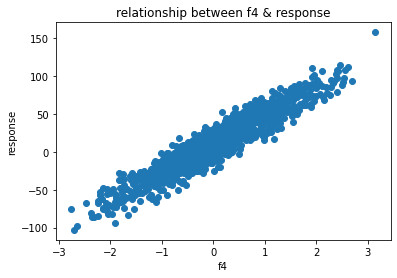

In [5]:
# let's plot f4 & response, cuz f4 corr value is close to 1
from matplotlib import pyplot as plt
plt.scatter(dt.f4, dt.response)
plt.xlabel('f4')
plt.ylabel('response')
plt.title('relationship between f4 & response')

In [6]:
# Redefine each column to be processed
columns = ['f1','f2','f3','f4','f5','response']
dt = dt.loc[:, columns]
dt.head()

,f1,f2,f3,f4,f5,response
0,-0.764216,-1.016209,0.149410,-0.050119,-0.578127,6.242514
1,0.763880,-1.159509,-0.721492,-0.654067,-0.431670,-8.118241
2,0.519329,-0.664621,-1.694904,1.339779,0.182764,66.722455
3,-0.177388,0.515623,0.135144,-0.647634,-0.405631,-27.716793
4,0.104022,0.749665,-0.939338,-0.090725,-0.639963,8.192075


In [7]:
# Splitting the training and test set with the ratio of 8:2

from sklearn.model_selection import train_test_split
features = ['f1','f2','f3','f4','f5'] # Data that we want to utilize as training & test
#X = dt.loc[:, features] # X are the data we want to use from 'features' = independent variable
#y = dt.loc[:, ['response']] # y is the data we want to use as target = dependent variable

X_data = np.array(dt.iloc[:,4])
y_data = np.array(dt.iloc[:,-1])

#X = dt[['f1','f2','f3','f4','f5']]
#y = dt['response']
#y = np.array((y-y.mean())/y.std())
#X = X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=1, train_size=0.8)

In [8]:
print(X_test)
#print(y)

[-3.84707797e-01 -1.37361359e+00 -1.10308714e+00  2.54715263e-01
 -1.60024462e+00 -1.14948622e+00  5.72671619e-01  1.11287157e+00
  1.22629307e+00 -5.22879722e-01 -1.00285570e-01 -2.34073027e-01
  4.38411156e-01  4.98915035e-01 -8.02897555e-01 -1.24190376e+00
 -1.15685899e-01 -4.65591002e-01 -8.19485690e-02  5.79420592e-01
  1.07825039e-01 -2.83557046e-01 -8.55854147e-01 -2.69256619e+00
 -7.71332965e-01  1.15126654e+00 -2.33394195e-01  1.36647648e+00
  8.37936395e-01 -1.48877925e+00  1.48388376e+00  1.97381024e+00
 -1.04902839e+00  3.00773425e+00 -6.52327286e-01 -2.29933415e-01
  5.08284917e-01  8.76084090e-02 -6.62743940e-02  9.53578165e-01
  8.09181436e-01 -2.68826397e+00 -1.72185524e+00  5.65847620e-01
  2.05657965e+00 -6.36840176e-01 -1.36803424e+00  1.25992606e+00
  8.58989121e-01  4.30062768e-01  2.47776525e-01  2.84893257e+00
 -6.45018880e-01  2.48589339e+00 -2.49280784e-01 -6.02111170e-01
  3.10721879e-01 -7.85438107e-01 -1.60124715e-01 -1.02669068e+00
  1.59743491e+00 -1.35258

In [9]:
alpha = 0.1 # Set learning rate to 0.1
max_epoch = 1000 # Set max iteration to 1000
bias = 0

In [10]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800,) (800,)
(200,) (200,)


In [11]:
def predictionn(w, X):
    # y = (w*x)+b, w = weights, X = input features
    yhat = (w * X) + bias
    return yhat
#prediction(w,X)

In [12]:
def loss_fn(y, yhat):
    loss = np.sum((y-yhat)**2)/len(y)
    return loss
#loss_fn(y, prediction(w,X))

In [13]:
def train_model(X, y, alpha, max_epoch):
    w = b = 0
    n = float(len(X))
    losses = []
    weights = []

    for i in range(max_epoch):
        def prediction(w, X):
            # y = (w*x)+b, w = weights, X = input features
            yhat = (w * X) + b
            return yhat;
        y_predict = prediction(w, X)
        loss = loss_fn(y, y_predict)

        losses.append(loss)
        weights.append(w)
        loss = (1/n) * sum([val**2 for val in (y-y_predict)])

        wd = -(2/n)*sum(X*(y-y_predict))
        bd = -(2/n)*sum(y-y_predict)

        w = w - alpha * wd
        b = b - alpha * bd

        print(f"Iteration {i+1}: Loss {loss}, Weight {w}, Bias {b}");
    plt.figure(figsize=(8,6))
    plt.plot(weights, losses)
    plt.scatter(weights, losses, marker='o', color='red')
    plt.title("Loss vs Weights")
    plt.ylabel("Loss")
    plt.xlabel("Weight")
    plt.show()

    return w, b

Iteration 1: Loss 1745.55215509794, Weight -0.18797553171664952, Bias 2.2673045171457513
Iteration 2: Loss 1698.9579709467612, Weight -0.3439976311112525, Bias 4.081575113813229
Iteration 3: Loss 1669.1079366380666, Weight -0.4733443720343996, Bias 5.533345992466324
Iteration 4: Loss 1649.984129094608, Weight -0.580457661871839, Bias 6.695056504123487
Iteration 5: Loss 1637.731751451047, Weight -0.6690671862405067, Bias 7.62466821931012
Iteration 6: Loss 1629.8815114209856, Weight -0.7422981049558978, Bias 8.368558866358585
Iteration 7: Loss 1624.8515793383533, Weight -0.8027640639455446, Bias 8.963837726677616
Iteration 8: Loss 1621.6285964534436, Weight -0.8526471073725101, Bias 9.440198162242678
Iteration 9: Loss 1619.5633559203782, Weight -0.8937660242768835, Bias 9.821399819107194
Iteration 10: Loss 1618.2399285522852, Weight -0.9276345714052336, Bias 10.126454545459634
Iteration 11: Loss 1617.3918296898971, Weight -0.9555108975109259, Bias 10.370575258321285
Iteration 12: Loss 16

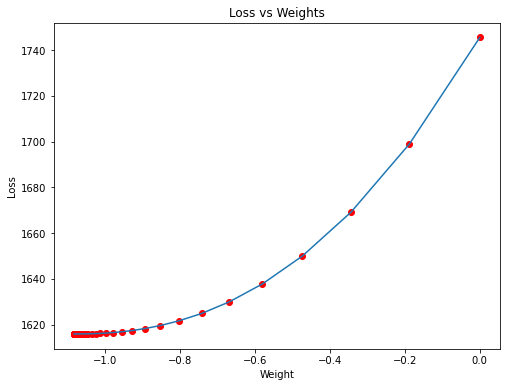

Estimated Weight: -1.0829295149110383
Estimated Bias: 11.34882185775755


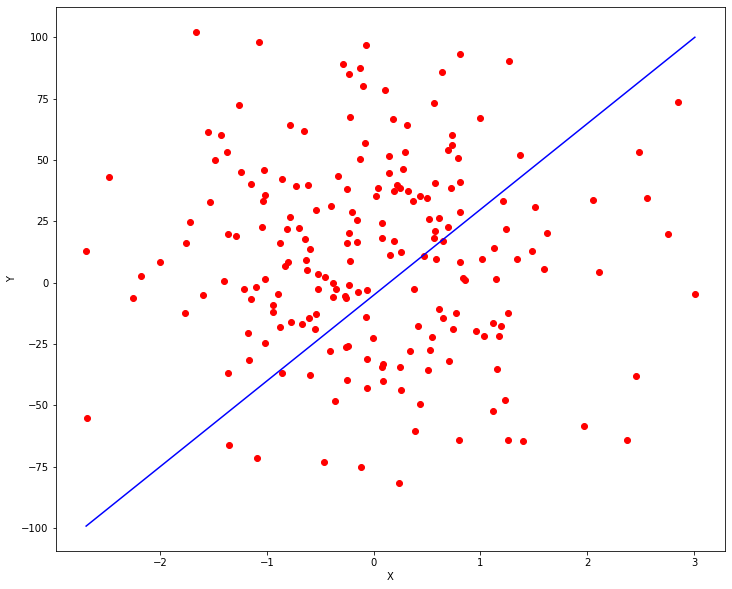

In [18]:
est_weight, est_bias = train_model(X_train, y_train, alpha, max_epoch)
print(f"Estimated Weight: {est_weight}\nEstimated Bias: {est_bias}")
y_pred = est_weight*y_test + est_bias
plt.figure(figsize = (12,10))
plt.scatter(X_test, y_test, marker='o', color='red')

plt.plot([min(X_test), max(X_test)], [min(y_pred), max(y_pred)], color='blue')

plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [19]:
y_pred

array([ 11.5909469 , -46.23433884,  13.41193567,  58.94509245,
        16.80814183, -32.07360704, -11.46905768,  67.96054832,
        63.36064179,   7.43418294, -75.19501229, -80.51367862,
        65.00751397, -26.03136075,   2.33286578, -37.62951731,
        92.56514751,  90.59190087, -50.22738733,   0.94338296,
       -73.47688757, -84.98172629,  51.18621094,  -2.43861932,
        28.91329077,  49.50171602,  12.49680211, -45.04138888,
         9.12994773, -42.85458043,  -2.71938157,  74.65536645,
       -13.01161853,  16.41917507, -55.55657187, -10.64751477,
        50.07911971,  47.12987469,  44.96456405,  32.80679649,
       -32.91731199,  70.99508486, -15.14961542, -67.70116387,
       -24.9849732 ,   1.32946312,  -9.89208915,  24.88767981,
        10.15183168, -26.75061849,  48.41945328, -68.52615808,
        -7.70818164, -46.46980742, -29.90871636,  27.15895018,
       -57.97267284, -58.05624732, -16.14658229, -38.33553699,
         5.52465377,  82.94385197, -12.9818163 ,  31.03

In [20]:
y_test

array([ -0.22358338,  53.17350751,  -1.9051229 , -43.95140213,
        -5.04125144,  40.09718851,  21.07051218, -52.27646461,
       -48.02881371,   3.61486031,  79.91640541,  84.8277743 ,
       -49.54957028,  34.51765059,   8.32552438,  45.22763346,
       -74.99687148, -73.17473383,  56.86077288,   9.60860218,
        78.32985274,  88.95366395, -36.78668698,  12.73161456,
       -16.21940179, -35.23118877,  -1.06006922,  52.07191231,
         2.04895527,  50.05256717,  12.99087635, -58.45860116,
        22.49494547,  -4.68207131,  61.7818545 ,  20.3118821 ,
       -35.76437554, -33.04098036, -31.04148675, -19.81474725,
        40.87628349, -55.07861978,  24.46921698,  72.99642741,
        33.55139421,   9.2520876 ,  19.61430612, -12.50206755,
         1.10532603,  35.18182839, -34.23180448,  73.7582445 ,
        17.59763977,  53.39094418,  38.0980827 , -14.59940661,
        64.0129332 ,  64.09010764,  25.38983726,  45.87958696,
         5.3781599 , -66.11236385,  22.46742546, -18.17